# SK5009 Kecerdasan Buatan Lanjut
## Tugas Kelompok 1: SVM

##  Library Preparation

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [168]:
df = pd.read_csv('penguins_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              325 non-null    object 
 1   Island               325 non-null    object 
 2   Clutch Completion    325 non-null    object 
 3   Date Egg             325 non-null    object 
 4   Culmen Length (mm)   325 non-null    float64
 5   Culmen Depth (mm)    325 non-null    float64
 6   Flipper Length (mm)  325 non-null    float64
 7   Body Mass (g)        325 non-null    float64
 8   Sex                  325 non-null    object 
 9   Delta 15 N (o/oo)    325 non-null    float64
 10  Delta 13 C (o/oo)    325 non-null    float64
dtypes: float64(6), object(5)
memory usage: 28.1+ KB


In [169]:
df.head(3)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


## Descriptive Statistics

In [170]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,44.054769,17.123077,201.264615,4216.000000,8.737794,-25.690217
std,5.472226,1.965942,13.964598,808.859222,0.552581,0.790098
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.500000,15.600000,190.000000,3550.000000,8.302310,-26.326010
50%,44.900000,17.300000,197.000000,4050.000000,8.658030,-25.852030
75%,48.700000,18.600000,213.000000,4800.000000,9.180210,-25.060200
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.890170


In [171]:
df.describe(include='object')

,Species,Island,Clutch Completion,Date Egg,Sex
count,325,325,325,325,325
unique,3,3,2,50,3
top,Adelie Penguin (Pygoscelis adeliae),Biscoe,Yes,11/27/07,FEMALE
freq,139,163,291,18,163


In [172]:
species_dict = {'Adelie Penguin (Pygoscelis adeliae)': 'Adelie', 
                'Chinstrap penguin (Pygoscelis antarctica)': 'Chinstrap', 
                'Gentoo penguin (Pygoscelis papua)': 'Gentoo'}

df['Species'] = df['Species'].replace(species_dict)
df['Species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## Categorical Feature Encoding

In [173]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numeric_cols = [col for col in df.columns if df[col].dtype in ('int64', 'float64')]

### Target

In [174]:
df['Species'].value_counts()

Species
Adelie       139
Gentoo       119
Chinstrap     67
Name: count, dtype: int64

In [175]:
species = ['Adelie', 'Chinstrap', 'Gentoo']

def encode_category(x, order):
    return order.index(x)

# df['Species'] = df['Species'].apply(lambda x: encode_category(x, species))

### Non-Target

In [176]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'Species']
for col in categorical_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

## Feature Selection

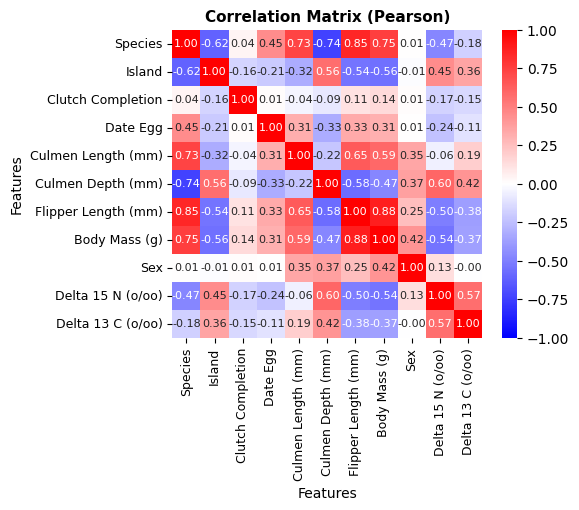

In [177]:
df_encoded = df.copy()
df_encoded['Species'] = df['Species'].apply(lambda x: encode_category(x, species))

plt.figure(figsize=(5, 4))
ax = sns.heatmap(df_encoded.corr(method='pearson'), vmin=-1, vmax=1, cmap='bwr', annot=True, fmt='.2f', annot_kws={'fontsize': 8})
ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize': 9})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize': 9})
plt.title('Correlation Matrix (Pearson)', fontweight='bold', fontsize='11')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.show()

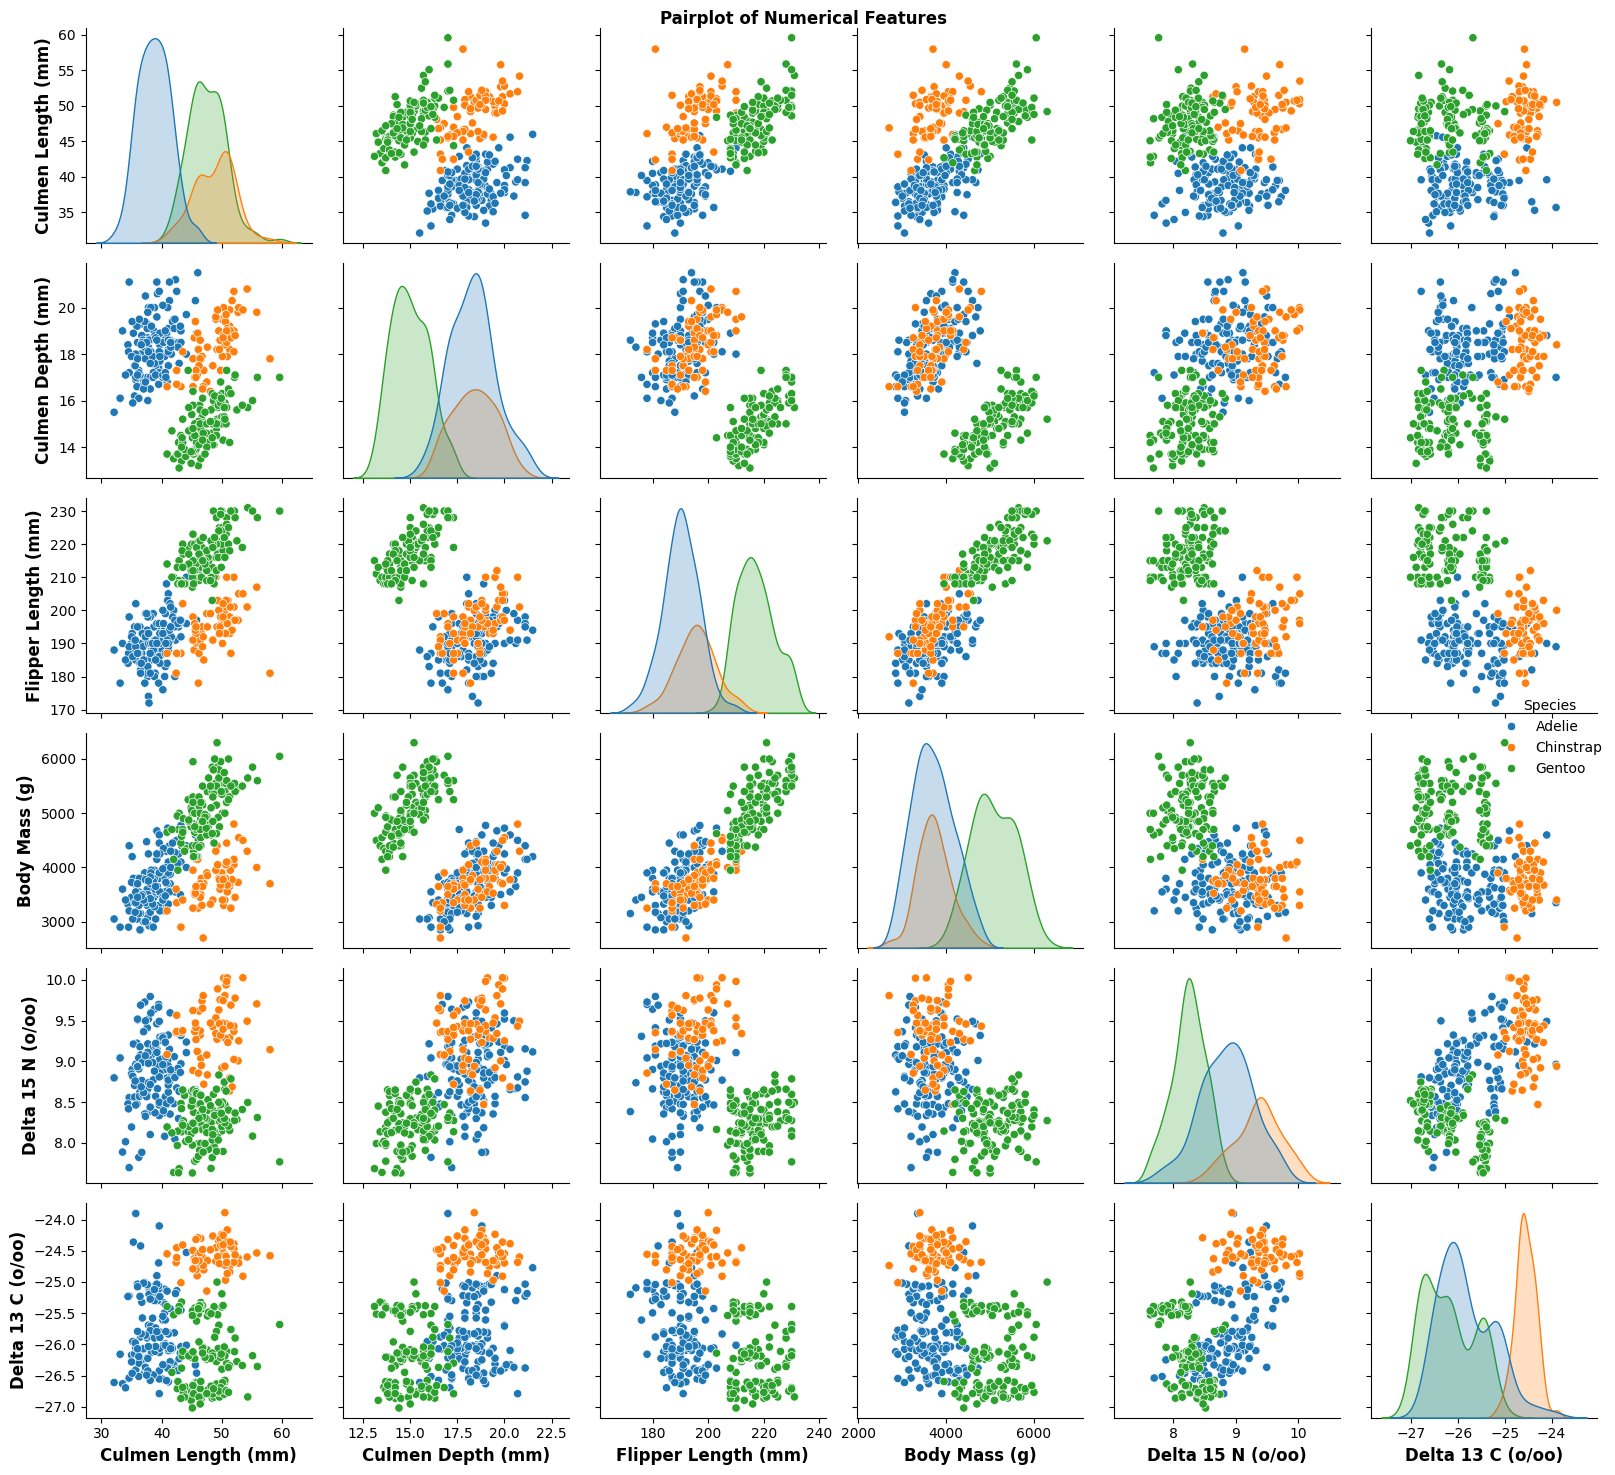

In [178]:
cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Species']
p = sns.pairplot(df[cols], kind='scatter', diag_kind='kde', corner=False, hue='Species',  
             plot_kws={}, 
             diag_kws={'color': 'blue'})

p.fig.suptitle('Pairplot of Numerical Features', fontsize=12, fontweight='bold')
for ax in p.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Two Features SVM

In [179]:
# cols = ['Flipper Length (mm)', 'Culmen Length (mm)']
cols = ['Culmen Length (mm)', 'Culmen Depth (mm)']
X = df[cols].to_numpy()
y = df['Species']
y_encoded = y.apply(lambda x: encode_category(x, species))

# X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, train_size=0.7, stratify=y, random_state=89)
# X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.33, stratify=y_val, random_state=89)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=0.8, stratify=y, random_state=89)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
# X_val_scaled = standard_scaler.transform(X_val)
X_test_scaled = standard_scaler.transform(X_test)

models = {
    'a': SVC(kernel='linear', C=1e0, decision_function_shape='ovr'), 
    'b': SVC(kernel='linear', C=2e0, decision_function_shape='ovr'), 
    'c': SVC(kernel='linear', C=5e0, decision_function_shape='ovr'),
    'd': SVC(kernel='linear', C=1e1, decision_function_shape='ovr'), 
    'e': SVC(kernel='linear', C=2e1, decision_function_shape='ovr'), 
    'f': SVC(kernel='linear', C=5e1, decision_function_shape='ovr'), 
    'g': SVC(kernel='linear', C=1e2, decision_function_shape='ovr') 
}

skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=89)

scoring = {'Accuracy': make_scorer(accuracy_score)}
for i, target in enumerate(species):
    target_idx = species.index(target)
    scoring[f'Precision_{target}'] = make_scorer(precision_score, average=None, labels=[target_idx])
    scoring[f'Recall_{target}'] = make_scorer(recall_score, average=None, labels=[target_idx])
    scoring[f'F1_{target}'] = make_scorer(f1_score, average=None, labels=[target_idx])

for i, avg_mode in enumerate(['micro', 'macro', 'weighted']):
    scoring[f'Precision_{avg_mode}'] = make_scorer(precision_score, average=avg_mode)
    scoring[f'Recall_{avg_mode}'] = make_scorer(recall_score, average=avg_mode)
    scoring[f'F1_{avg_mode}'] = make_scorer(f1_score, average=avg_mode)
    
all_metrics_val = {}
for name, model in models.items():
    res = pd.DataFrame(cross_validate(model, X_train_scaled, y_train, cv=skf, scoring=scoring))
    # res.to_csv(f'{name}_base.csv')
    all_metrics_val[name] = res

avg_metrics_val = pd.DataFrame()
for name, metrics in all_metrics_val.items():
    avg_metrics_val[name] = metrics.mean()

# avg_metrics_val.to_csv('avg_base.csv')
avg_metrics_val.loc["test_F1_macro"]

a    0.947653
b    0.956344
c    0.947653
d    0.947653
e    0.938398
f    0.927815
g    0.927815
Name: test_F1_macro, dtype: float64

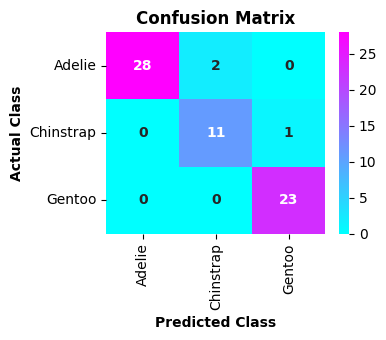

In [180]:
def plot_confusion_matrix(cm, class_names, figsize, cmap, filename='cm'):
    plt.figure(figsize=figsize)
    p = sns.heatmap(cm, annot=True, fmt='d', annot_kws={'fontweight':'bold'}, cmap=cmap, 
                    xticklabels=class_names, yticklabels=class_names)
    p.set_xticklabels(p.get_xticklabels(), rotation=90, fontsize = 10)
    p.set_yticklabels(p.get_yticklabels(), rotation=0, fontsize = 10)
    plt.xlabel('Predicted Class', fontweight='bold')
    plt.ylabel('Actual Class', fontweight='bold')
    plt.title('Confusion Matrix', fontweight='bold')
    plt.tight_layout()
    # plt.savefig(os.path.join(OUTPUT_DIR, f'{filename}.png'))
    plt.show()

model = models['c']
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_pred, y_test)
plot_confusion_matrix(cm, species, (4, 3.5), 'cool')

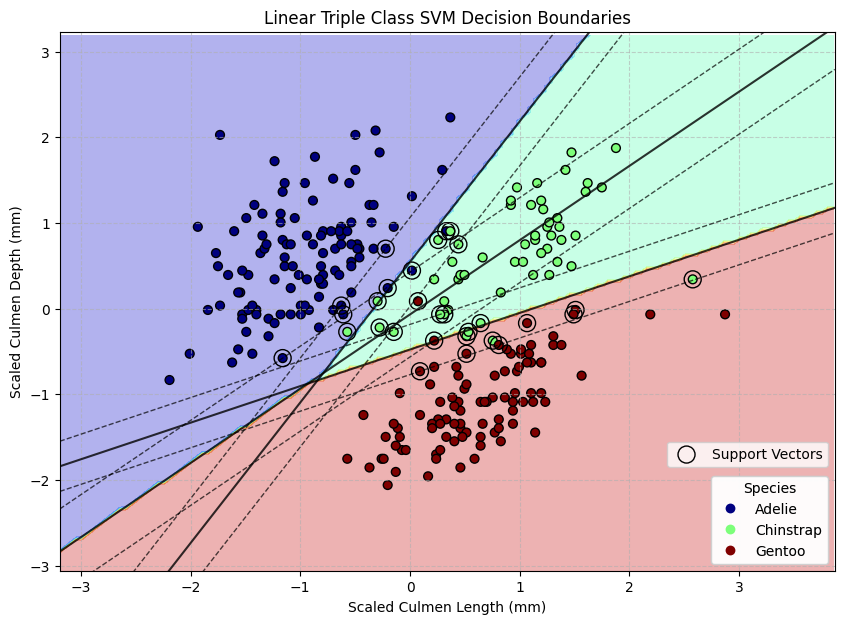

In [181]:
model = models['c']
model.fit(X_train_scaled, y_train)

def visualize_2d_svm(X, y, model, cols, target):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                        np.arange(y_min, y_max, 0.05))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 7))

    # Decision Surface (Multiclass Regions)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='jet')

    # Original Data Points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet, s=40, edgecolors='k')

    # Support Vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=150, facecolors='none', edgecolors='k', linewidth=1, label='Support Vectors')

    # Margins
    W = model.coef_
    B = model.intercept_
    x0_range = np.linspace(x_min, x_max, 200)
    for i in range(W.shape[0]):
        w = W[i]
        b = B[i]
        
        # Check if w[1] is near zero to prevent division by zero
        if np.abs(w[1]) < 1e-10:
            continue 
        
        # Hyperplane: x1 = -w0/w1 * x0 - b/w1 (where w.x + b = 0)
        decision_boundary = -w[0] / w[1] * x0_range - b / w[1]
        
        # Margin Lines: w.x + b = 1 and w.x + b = -1
        margin = 1 / w[1]
        gutter_up = decision_boundary + margin
        gutter_down = decision_boundary - margin
    
        plt.plot(x0_range, gutter_up, "k--", linewidth=1.0, alpha=0.7)
        plt.plot(x0_range, gutter_down, "k--", linewidth=1.0, alpha=0.7)
        plt.plot(x0_range, decision_boundary, "k-", linewidth=1.5, alpha=0.8, zorder=5)

    plt.xlabel(f'Scaled {cols[0]}')
    plt.ylabel(f'Scaled {cols[1]}')
    plt.title('Linear Triple Class SVM Decision Boundaries')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Scatter legends
    legend1 = plt.legend(loc='lower right', bbox_to_anchor=(1, 0.18))
    
    handles, _ = scatter.legend_elements()
    legend2 = plt.legend(handles, target,
                        title="Species", 
                        loc="lower right")
    
    plt.gca().add_artist(legend1)
    plt.gca().add_artist(legend2)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

visualize_2d_svm(X_train_scaled, y_train, model, cols, species)

### Three Features SVM

In [182]:
cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)']
X = df[cols].to_numpy()
y = df['Species']
y_encoded = y.apply(lambda x: encode_category(x, species))

# X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, train_size=0.7, stratify=y, random_state=89)
# X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.33, stratify=y_val, random_state=89)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=0.8, stratify=y, random_state=89)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
# X_val_scaled = standard_scaler.transform(X_val)
X_test_scaled = standard_scaler.transform(X_test)

models = {
    'a': SVC(kernel='linear', C=1e0, decision_function_shape='ovr'), 
    'b': SVC(kernel='linear', C=2e0, decision_function_shape='ovr'), 
    'c': SVC(kernel='linear', C=5e0, decision_function_shape='ovr'),
    'd': SVC(kernel='linear', C=1e1, decision_function_shape='ovr'), 
    'e': SVC(kernel='linear', C=2e1, decision_function_shape='ovr'), 
    'f': SVC(kernel='linear', C=5e1, decision_function_shape='ovr'), 
    'g': SVC(kernel='linear', C=1e2, decision_function_shape='ovr') 
}
    
all_metrics_val = {}
for name, model in models.items():
    res = pd.DataFrame(cross_validate(model, X_train_scaled, y_train, cv=skf, scoring=scoring))
    # res.to_csv(f'{name}_base.csv')
    all_metrics_val[name] = res

avg_metrics_val = pd.DataFrame()
for name, metrics in all_metrics_val.items():
    avg_metrics_val[name] = metrics.mean()

# avg_metrics_val.to_csv('avg_base.csv')
avg_metrics_val.loc["test_F1_macro"]

a    0.991707
b    1.000000
c    0.995679
d    1.000000
e    1.000000
f    1.000000
g    1.000000
Name: test_F1_macro, dtype: float64

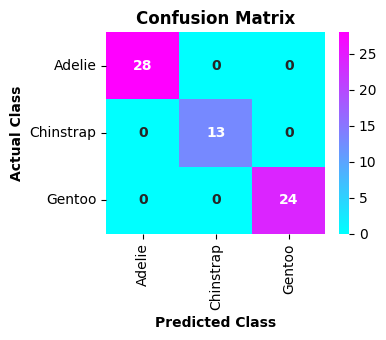

In [183]:
model = models['d']
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_pred, y_test)
plot_confusion_matrix(cm, species, (4, 3.5), 'cool')

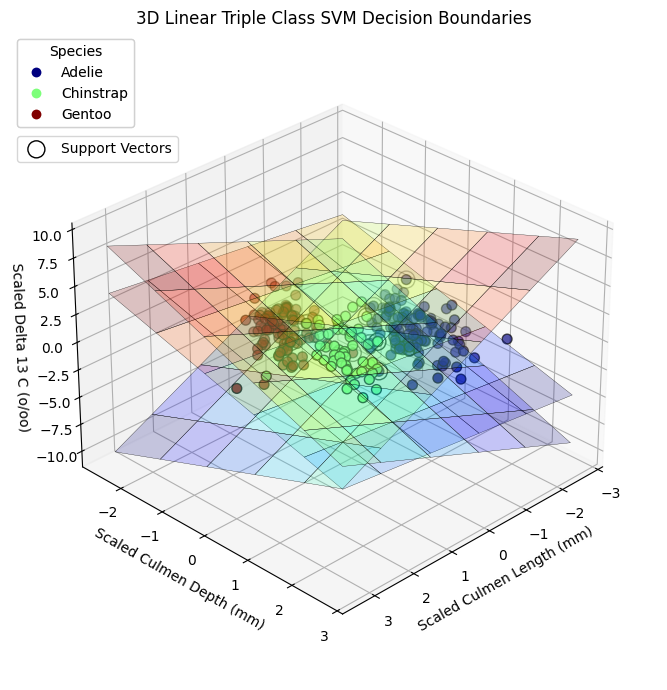

In [184]:
model = models['d']
def visualize_3d_svm(X, y, model, cols, target):
    model.fit(X, y)

    fig = plt.figure(figsize=(9, 7), constrained_layout=True)
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=30, azim=45, roll=0)

    # Data Points
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2],
                        c=y, cmap=plt.cm.jet, s=50, edgecolors='k')

    # Support Vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], model.support_vectors_[:, 2], 
                s=150, facecolors='none', edgecolors='k', linewidth=1, label='Support Vectors')

    # Plotting range for hyperplanes
    # Use a 2D grid (xx, yy) for the first two features, which are the x and y axes in 3D
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 20),
                        np.linspace(y_min, y_max, 20))

    # Hyperplanes
    W = model.coef_ # (3, 3) matrix of weights
    B = model.intercept_ # (3,) vector of biases

    for i in range(W.shape[0]):
        w = W[i]
        b = B[i]
        
        # Solve the hyperplane equation for x2 (the z-axis)
        # w0*x0 + w1*x1 + w2*x2 + b = 0  =>  x2 = (-w0/w2)*x0 + (-w1/w2)*x1 - b/w2
        if np.abs(w[2]) < 1e-6: # Skip if coefficient is near zero to avoid division by zero
            continue
            
        # Calculate the z-coordinates (x2) for the hyperplane
        zz = (-w[0] * xx - w[1] * yy - b) / w[2]
        
        ax.plot_surface(xx, yy, zz, alpha=0.2, cmap=plt.cm.jet, rcount=5, ccount=5, edgecolors='k', linewidth=0.2)

    ax.set_xlabel(f'Scaled {cols[0]}', labelpad=5)
    ax.set_ylabel(f'Scaled {cols[1]}', labelpad=5)
    ax.set_zlabel(f'Scaled {cols[2]}', labelpad=5)
    ax.set_title('3D Linear Triple Class SVM Decision Boundaries')

    legend1 = plt.legend(loc='upper left', bbox_to_anchor=(0, 0.85))
    
    handles, _ = scatter.legend_elements()
    legend2 = plt.legend(handles, target,
                        title="Species", 
                        loc="upper left")
    
    plt.gca().add_artist(legend1)
    plt.gca().add_artist(legend2)
    plt.grid(True)
    ax.set_box_aspect(None, zoom=0.9)
    plt.tight_layout()
    plt.show()

visualize_3d_svm(X_train_scaled, y_train, model, cols, species)

In [185]:
# X = df[['Flipper Length (mm)', 'Culmen Length (mm)', 'Culmen Depth (mm)']].to_numpy()
# y = df['Species']
# y_encoded = y.apply(lambda x: encode_category(x, species))

# # 3. Train SVM on all three features
# model = SVC(kernel='linear', C=1.0)
# model.fit(X, y_encoded)

# # --- Visualization Logic ---

# # We only use the first two scaled features for plotting bounds
# x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
# y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2

# # Create meshgrid using only the first two dimensions
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
#                      np.arange(y_min, y_max, 0.05))

# slice_feature_index = 2
# median_depth = np.median(X[:, slice_feature_index])
# # Prepare the mesh for prediction: Append the median depth value to every point
# # xx.ravel() and yy.ravel() are the first two dimensions. We add the third dimension (median_depth)
# median_slice = np.full(xx.ravel().shape, median_depth)
# X_mesh_sliced = np.c_[xx.ravel(), yy.ravel(), median_slice]


# # Predict the class for every point in the sliced mesh
# Z = model.predict(X_mesh_sliced)
# Z = Z.reshape(xx.shape)

# plt.figure(figsize=(10, 7))

# # Plot Decision Surface
# plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# # Plot Data Points (using only the first two scaled features)
# scatter = plt.scatter(X[:, 0], X[:, 1], c=y_encoded, cmap=plt.cm.coolwarm, s=40, edgecolors='k')

# # Plot Support Vectors (using only the first two scaled features)
# plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
#             s=180, facecolors='none', edgecolors='k', linewidth=2.0, label='Support Vectors')

# # Add labels
# plt.xlabel('Culmen Length (Standardized)')
# plt.ylabel('Flipper Length (Standardized)')
# plt.title(f'Linear SVM Decision Boundary (Sliced at Median Culmen Depth)')
# plt.grid(True, linestyle='--', alpha=0.6)

# plt.show()

In [186]:
# model.coef_, model.intercept_, model.support_vectors_

## SVM

In [187]:
# Analisis SVM
# Bangun model supaya akurasinya bagus
# Mencari hyperparameter terbaik
# 1 tim memilih 1 dataset berlabel
# Train:Test:Val = 70:20:10 (Label di subset val dihapus dulu, dibandingkan dengan prediksinya)